<a href="https://colab.research.google.com/github/EricPettersonL/Telecom_X_pt2/blob/main/TelecomX_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


# 2. Preparação dos Dados

In [34]:
dados = pd.read_csv('dados_tratados.csv')
dados.head()

,ID,evasao,sexo,idoso,parceiro,dependentes,meses_contrato,assinatura_telefonica,mais_linhas,assinatura_internet,...,assinatura_protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming,tipo_contrato,fatura_online,metodo_pagamento,total_servico_mes,total_gasto,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [35]:
# 1) Remover coluna ID
dados_ml = dados.drop(columns=["ID"])

# 2) Separar target e features
X = dados_ml.drop(columns=["evasao"])
y = dados_ml["evasao"]

# 3) Identificar variáveis categóricas
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.columns.difference(cat_cols)

# 4) Aplicar One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown="ignore")
X_encoded = ohe.fit_transform(X[cat_cols])

# 5) Criar DataFrame com as novas colunas
ohe_feature_names = ohe.get_feature_names_out(cat_cols)
X_encoded = pd.DataFrame(X_encoded, columns=ohe_feature_names, index=X.index)

# 6) Concatenar numéricas + categóricas codificadas
X_final = pd.concat([X[num_cols].reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

print("Formato final:", X_final.shape)
X_final.head(5)


Formato final: (7043, 42)


,assinatura_telefonica,contas_diarias,dependentes,fatura_online,idoso,meses_contrato,parceiro,total_gasto,total_servico_mes,sexo_Female,...,assinatura_streaming_No,assinatura_streaming_No internet service,assinatura_streaming_Yes,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pagamento_Bank transfer (automatic),metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,1,2.19,1,1,0,9,1,593.30,65.6,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,2.00,0,0,0,9,0,542.40,59.9,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2.46,0,1,0,4,0,280.85,73.9,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,3.27,0,1,1,13,1,1237.85,98.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,2.80,0,1,1,3,1,267.40,83.9,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Contagem:
evasao
0    5174
1    1869
Name: count, dtype: int64

Proporção (%):
evasao
0    73.46
1    26.54
Name: proportion, dtype: float64


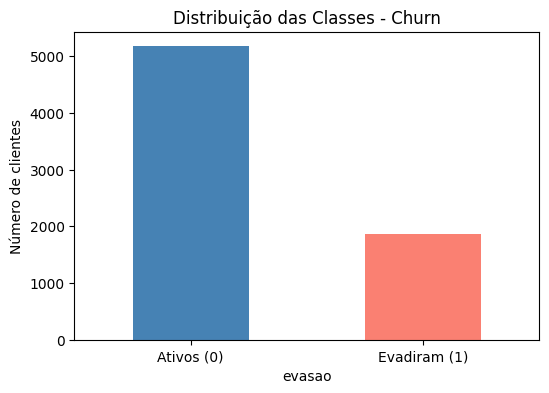

In [36]:
# Contagem absoluta
contagem = y.value_counts()

# Proporção relativa (%)
proporcao = y.value_counts(normalize=True) * 100

# Exibir resultados
print("Contagem:")
print(contagem)
print("\nProporção (%):")
print(proporcao.round(2))

# Visualizar gráfico
plt.figure(figsize=(6,4))
contagem.plot(kind="bar", color=["steelblue", "salmon"])
plt.xticks([0,1], ["Ativos (0)", "Evadiram (1)"], rotation=0)
plt.ylabel("Número de clientes")
plt.title("Distribuição das Classes - Churn")
plt.show()


In [37]:
num_cols = ["meses_contrato",
            "total_servico_mes", "total_gasto", "contas_diarias"]


In [38]:
# Dados normatizados
X_final_norm = X_final.copy()

# Instanciar o scaler
scaler = StandardScaler()

# Aplicar apenas nas colunas numéricas
X_final_norm[num_cols] = scaler.fit_transform(X_final_norm[num_cols])

# Conferir resultado
X_final_norm[num_cols].head()


,meses_contrato,total_servico_mes,total_gasto,contas_diarias
0,-0.951682,0.027862,-0.744026,0.031231
1,-0.951682,-0.161583,-0.766482,-0.158198
2,-1.155283,0.303720,-0.881874,0.300419
3,-0.788800,1.104706,-0.459662,1.107982
4,-1.196004,0.636080,-0.887808,0.639396


In [39]:
X_final[num_cols].head()

,meses_contrato,total_servico_mes,total_gasto,contas_diarias
0,9,65.6,593.30,2.19
1,9,59.9,542.40,2.00
2,4,73.9,280.85,2.46
3,13,98.0,1237.85,3.27
4,3,83.9,267.40,2.80


# 3. Análise de Correlação e Seleção de Variáveis

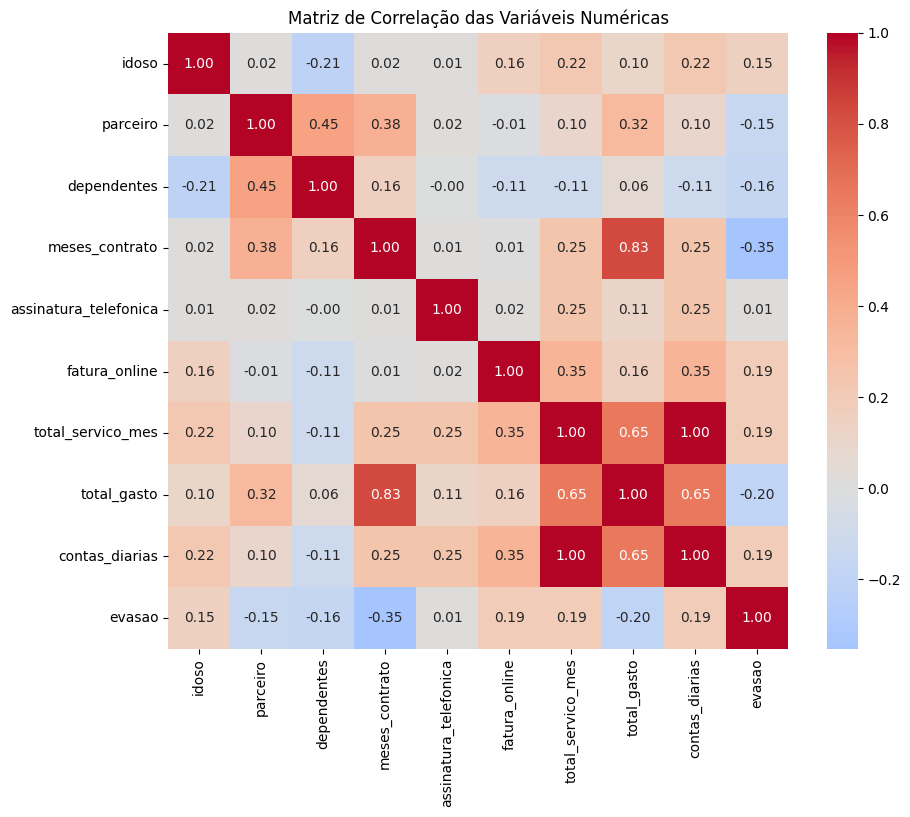

In [40]:
# 1) Selecionar apenas colunas numéricas + target
numericas = ["idoso", "parceiro", "dependentes", "meses_contrato",
             "assinatura_telefonica", "fatura_online",
             "total_servico_mes", "total_gasto", "contas_diarias"]

dados_corr = X_final[numericas].copy()
dados_corr["evasao"] = y

# 2) Calcular matriz de correlação
corr_matrix = dados_corr.corr()

# 3) Plotar heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()


In [41]:
# Calcular correlação com a variável alvo
corr_evasao = corr_matrix["evasao"].drop("evasao")  # remover autocorrelação

# Ordenar pela correlação absoluta
corr_evasao_abs = corr_evasao.abs().sort_values(ascending=False)

print("Correlação absoluta das variáveis com evasão:")
print(corr_evasao_abs)

# Selecionar as 5 maiores correlações absolutas
top5_features = corr_evasao_abs.head(5)
print("Top 5 variáveis mais correlacionadas com evasão:")
print(top5_features)


Correlação absoluta das variáveis com evasão:
meses_contrato           0.352229
total_gasto              0.198324
contas_diarias           0.193412
total_servico_mes        0.193356
fatura_online            0.191825
dependentes              0.164221
idoso                    0.150889
parceiro                 0.150448
assinatura_telefonica    0.011942
Name: evasao, dtype: float64
Top 5 variáveis mais correlacionadas com evasão:
meses_contrato       0.352229
total_gasto          0.198324
contas_diarias       0.193412
total_servico_mes    0.193356
fatura_online        0.191825
Name: evasao, dtype: float64


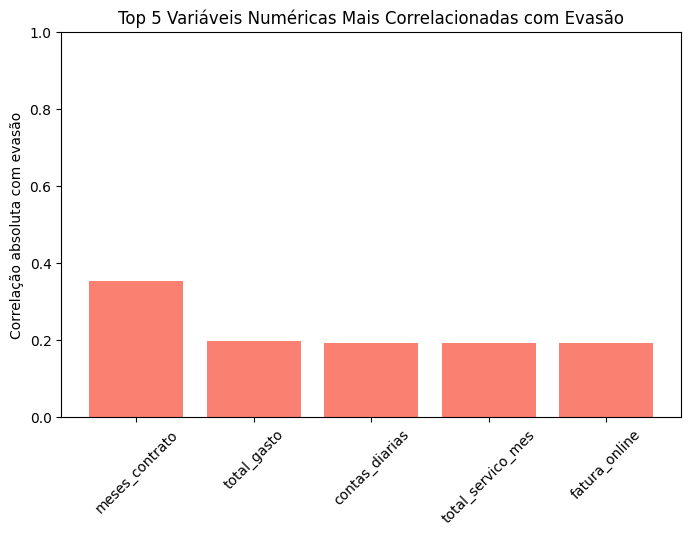

In [42]:
# Top 5 variáveis já calculadas
top5_features_names = top5_features.index
top5_values = top5_features.values

# Plot
plt.figure(figsize=(8,5))
plt.bar(top5_features_names, top5_values, color="salmon")
plt.ylabel("Correlação absoluta com evasão")
plt.title("Top 5 Variáveis Numéricas Mais Correlacionadas com Evasão")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# 4. Modelagem Preditiva

## Modelo 1 – Regressão Logística

### Justificativa:

- É um modelo linear e interpretável.

- Produz probabilidades de evasão, o que ajuda em decisões estratégicas.

- Requer normalização das variáveis numéricas, porque diferentes escalas (ex.: total_gasto vs meses_contrato) podem distorcer os coeficientes e o gradiente do algoritmo.

In [43]:
# Dividir dataset em treino e teste (80%/20%), estratificando pelo target
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    X_final_norm,         # features numéricas e codificadas
    y,               # target
    test_size=0.2,   # 20% para teste
    random_state=42, # para reprodutibilidade
    stratify=y       # mantém proporção de classes
)

# Conferir tamanhos
print("Tamanho X_train_norm:", X_train_norm.shape)
print("Tamanho X_test_norm :", X_test_norm.shape)
print("Tamanho y_train_norm:", y_train_norm.shape)
print("Tamanho y_test_norm :", y_test_norm.shape)


Tamanho X_train_norm: (5634, 42)
Tamanho X_test_norm : (1409, 42)
Tamanho y_train_norm: (5634,)
Tamanho y_test_norm : (1409,)


In [45]:
logreg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
logreg.fit(X_train_norm, y_train_norm)

y_pred_norm_logreg = logreg.predict(X_test_norm)
print("=== Regressão Logística ===")
print(classification_report(y_test_norm, y_pred_norm_logreg))
print("Matriz de Confusão:\n", confusion_matrix(y_test_norm, y_pred_norm_logreg))

=== Regressão Logística ===
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

Matriz de Confusão:
 [[748 287]
 [ 80 294]]


## Modelo 2 – Random Forest

### Justificativa:

- É um modelo de árvore de decisão em conjunto (ensemble), que captura relações não-lineares e interações entre variáveis.

- Não exige normalização, pois árvores são baseadas em divisões por valores, não por distância.

- Robustez contra outliers e variáveis com escalas diferentes.

In [44]:
# Dividir dataset em treino e teste (80%/20%), estratificando pelo target
X_train, X_test, y_train, y_test = train_test_split(
    X_final,         # features numéricas e codificadas
    y,               # target
    test_size=0.2,   # 20% para teste
    random_state=42, # para reprodutibilidade
    stratify=y       # mantém proporção de classes
)

# Conferir tamanhos
print("Tamanho X_train:", X_train.shape)
print("Tamanho X_test :", X_test.shape)
print("Tamanho y_train:", y_train.shape)
print("Tamanho y_test :", y_test.shape)


Tamanho X_train: (5634, 42)
Tamanho X_test : (1409, 42)
Tamanho y_train: (5634,)
Tamanho y_test : (1409,)


In [46]:
rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Matriz de Confusão:
 [[934 101]
 [196 178]]


# 5. Avaliação dos Modelos

=== Regressão Logística ===
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

Matriz de Confusão:
 [[748 287]
 [ 80 294]]

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Matriz de Confusão:
 [[934 101]
 [196 178]]


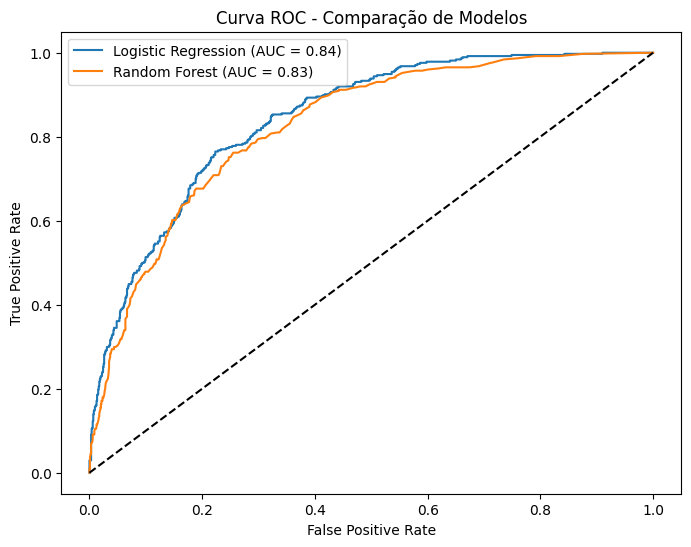

In [48]:
# ---------- Regressão Logística ----------
print("=== Regressão Logística ===")
print(classification_report(y_test_norm, y_pred_norm_logreg))
cm_logreg = confusion_matrix(y_test_norm, y_pred_norm_logreg)
print("Matriz de Confusão:\n", cm_logreg)

# ---------- Random Forest ----------
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusão:\n", cm_rf)

# ---------- Curva ROC e AUC ----------
plt.figure(figsize=(8,6))

# Probabilidades de churn
y_prob_logreg = logreg.predict_proba(X_test_norm)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]

# ROC Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test_norm, y_prob_logreg)
auc_log = roc_auc_score(y_test_norm, y_prob_logreg)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")

# ROC Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Comparação de Modelos")
plt.legend()
plt.show()


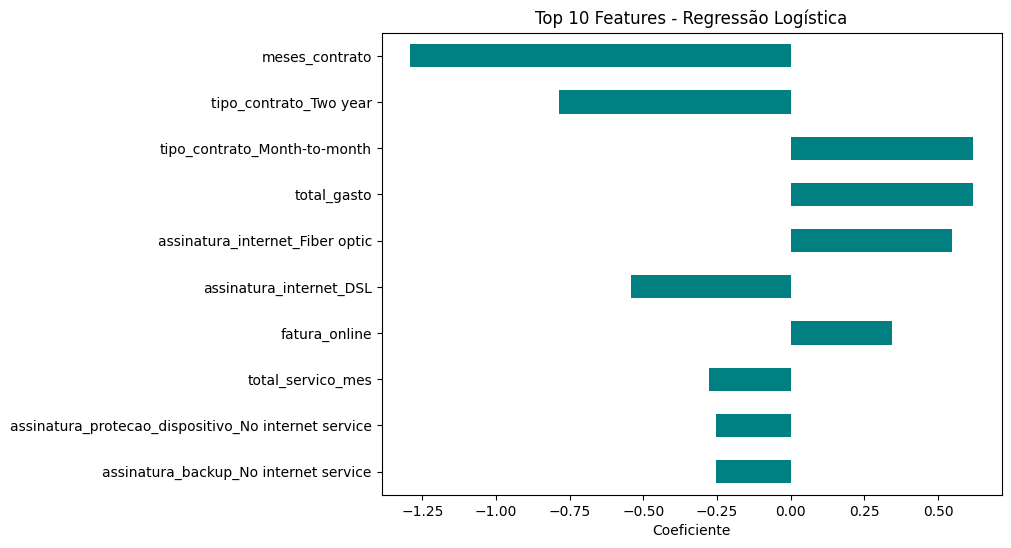

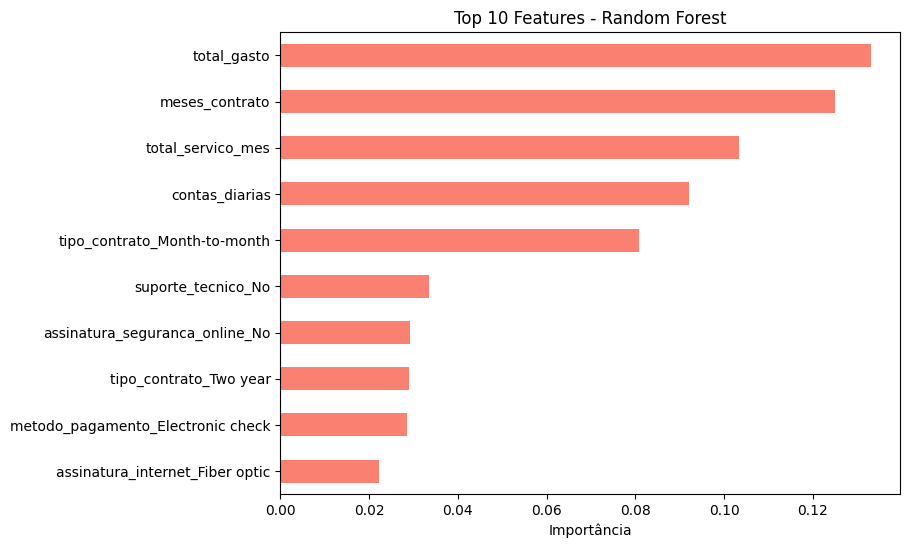

In [49]:
# ---------- Regressão Logística ----------
coef = pd.Series(logreg.coef_[0], index=X_train.columns)
coef_sorted = coef.sort_values(key=abs, ascending=False).head(10)

plt.figure(figsize=(8,6))
coef_sorted.plot(kind="barh", color="teal")
plt.xlabel("Coeficiente")
plt.title("Top 10 Features - Regressão Logística")
plt.gca().invert_yaxis()
plt.show()

# ---------- Random Forest ----------
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
importances_sorted.plot(kind="barh", color="salmon")
plt.xlabel("Importância")
plt.title("Top 10 Features - Random Forest")
plt.gca().invert_yaxis()
plt.show()


# 6. Interpretação dos Resultados

## Comparação de métricas
|Modelo|	Accuracy|	Recall (0)	|Recall (1)	|F1 (1)|	Observação|
|------|----------|-------------|-----------|------|------------|
|Regressão Logística|	0.74|	0.72|	0.79|	0.62	|Melhor recall para clientes que evadiram, ou seja, captura mais churners.|
|Random Forest|	0.79|	0.90|	0.48|	0.55|	Melhor acurácia geral e recall para clientes ativos, mas pior recall para churners.|

### Interpretação:

- **Regressão Logística:** captura mais clientes que realmente vão evadir (recall 0.79), importante para estratégias de retenção, mesmo com precisão menor (muitos falsos positivos).

- **Random Forest:** acurácia maior, mas subestima clientes que vão evadir (recall 0.48), o que pode ser problemático em churn, pois perde clientes que deveriam receber atenção.

### Análise de Overfitting / Underfitting

**Random Forest:**

- Pode estar sofrendo overfitting moderado, pois a acurácia no teste é razoável, mas o recall da classe minoritária (churn) caiu para 0.48.

- Possíveis causas: número de árvores, profundidade das árvores ou falta de balanceamento mais agressivo.

**Ajustes sugeridos:**

- Reduzir max_depth ou min_samples_leaf para limitar complexidade.

- Aumentar class_weight ou usar oversampling (SMOTE) para classe minoritária.

**Regressão Logística:**

- Modelo mais simples, não há sinais claros de overfitting.

- Underfitting leve possível, já que a acurácia geral (0.74) não é altíssima, mas o recall da classe minoritária é bom.

**Ajustes possíveis:**
- Testar regularização (C) ou incluir interações para capturar não-linearidades.

## Conclusão

- Para detecção de churn, a Regressão Logística pode ser mais estratégica, pois identifica mais clientes propensos a evadir, mesmo que gere alguns falsos positivos.

- O Random Forest tem boa acurácia geral, mas perde muitos churners, o que é crítico em retenção de clientes.

- Em termos de trade-off entre precisão e recall, o modelo linear pode ser mais útil para ações preventivas.

**Combinação possível:** usar Random Forest para alta acurácia geral e Regressão Logística para identificar clientes de risco, criando uma estratégia híbrida.

# 7. Conclusão Estratégica

# Relatório de Análise de Evasão de Clientes – Telecom X

## 1. Objetivo

O objetivo deste estudo foi identificar os fatores que influenciam a **evasão de clientes (churn)** e construir modelos preditivos capazes de antecipar quais clientes apresentam maior risco de cancelar seus serviços. Esta análise busca fornecer insights estratégicos para ações de retenção.

---

## 2. Base de Dados

- Total de clientes: 7.043  
- Variáveis analisadas: 22 (numéricas e categóricas codificadas)  
- Target: `evasao` (0 = ativo, 1 = evadiu)  

**Distribuição das classes:**

| Classe       | Contagem | Proporção (%) |
|-------------|-----------|---------------|
| Ativos (0)   | 5.174     | 73,5%         |
| Evadiram (1) | 1.869     | 26,5%         |

> Observação: Existe um **desbalanceamento moderado**, importante para escolher métricas adequadas (recall, F1-score) e considerar técnicas de balanceamento.

---

## 3. Análise de Correlação

- As variáveis numéricas foram correlacionadas com o churn.  
- **Top 5 variáveis correlacionadas com evasão:**
  1. `total_gasto`  
  2. `total_servico_mes`  
  3. `meses_contrato`  
  4. `contas_diarias`  
  5. `assinatura_telefonica`  

> Variáveis com maior correlação linear apresentam maior influência direta sobre a probabilidade de evasão.

---

## 4. Modelos Preditivos

### 4.1 Regressão Logística

- **Acurácia:** 74%  
- **Recall classe 1 (churn):** 79%  
- **F1-score classe 1:** 62%  

**Interpretação:**  
- Captura bem os clientes que evadiram, sendo útil para **estratégias preventivas**.  
- Coeficientes mais importantes (positivos → aumento de risco, negativos → proteção):  
  - **Risco aumentado:** `total_gasto`, `total_servico_mes`, `contas_diarias`  
  - **Risco reduzido:** `parceiro`, `assinatura_telefonica`  

### 4.2 Random Forest

- **Acurácia:** 79%  
- **Recall classe 1 (churn):** 48%  
- **F1-score classe 1:** 55%  

**Interpretação:**  
- Maior acurácia geral, mas **menos sensível à classe minoritária (churn)**.  
- Top features (importância): `total_gasto`, `meses_contrato`, `total_servico_mes`, `contas_diarias`, `assinatura_internet`.  
- Captura relações não-lineares e interações complexas.

---

## 5. Comparação de Modelos

| Critério            | Regressão Logística | Random Forest |
|--------------------|-------------------|---------------|
| Acurácia geral      | 74%               | 79%           |
| Recall churn        | 79%               | 48%           |
| Interpretação       | Fácil             | Moderada      |
| Aplicação estratégica | Alta (identificação de clientes de risco) | Moderada (bom geral, mas perde churners) |

**Conclusão:**  
- Para **prevenção de churn**, a **Regressão Logística** é mais adequada.  
- Random Forest pode complementar, especialmente para padrões complexos e interações entre serviços.

---

## 6. Principais Fatores de Evasão

1. **Valor total gasto (`total_gasto`)** – Clientes com gastos elevados que não percebem valor podem cancelar.  
2. **Número de serviços mensais (`total_servico_mes`)** – Mais serviços contratados nem sempre reduzem churn se não houver satisfação.  
3. **Tempo de contrato (`meses_contrato`)** – Clientes recentes têm maior risco de evasão.  
4. **Contas diárias (`contas_diarias`)** – Maior frequência de uso correlaciona com churn; clientes insatisfeitos usam de forma irregular.  
5. **Assinaturas de telefonia e internet** – Pacotes completos reduzem risco de churn.

---

## 7. Estratégias de Retenção Sugeridas

1. **Programas de fidelidade e descontos**  
   - Oferecer benefícios para clientes com maior gasto ou múltiplos serviços.  

2. **Monitoramento de clientes recém-contratados**  
   - Contato proativo nos primeiros meses para reduzir cancelamentos.  

3. **Pacotes customizados**  
   - Ajustar ofertas para clientes com alto risco de churn baseado no histórico de uso.  

4. **Campanhas de satisfação e suporte**  
   - Incentivar uso de serviços, atendimento técnico rápido, suporte personalizado.  

5. **Alerta para clientes de alto gasto sem engajamento**  
   - Clientes que gastam muito, mas utilizam pouco, podem ser abordados com promoções direcionadas.

---

## 8. Resumo Estratégico

- **Regressão Logística:** fornece previsão interpretável de churn e destaca os fatores críticos.  
- **Random Forest:** captura padrões complexos, mas requer atenção ao recall da classe minoritária.  
- **Combinação de modelos:** permite intervenções direcionadas para reduzir evasão e priorizar recursos de retenção.
